In [3]:
%load_ext autoreload
%autoreload 2
%load_ext lab_black
from pyspark.sql import functions as F, Window
from manga_recsys.spark import get_spark

spark = get_spark()

In [5]:
from IPython.display import display
from manga_recsys.models.manga import get_manga_tags

manga_info = spark.read.parquet(
    "../data/processed/2022-12-17-metadata-listing/manga_info.parquet"
)

In [11]:
manga_genres = get_manga_tags(manga_info, "genre")
manga_genres.show(n=3, truncate=False)

+------------------------------------+-----------------------+
|id                                  |tags                   |
+------------------------------------+-----------------------+
|0001183c-2089-48e9-96b7-d48db5f1a611|[Psychological, Drama] |
|00016bf9-455f-44e5-ab27-55ac7f69aad2|[Sci-Fi, Tragedy]      |
|000245bf-670e-49c5-af47-1d674a43525c|[Comedy, Slice of Life]|
+------------------------------------+-----------------------+
only showing top 3 rows



In [13]:
from manga_recsys.models.manga import generate_manga_tags_tfidf_lsi
from manga_recsys.models.manga import generate_recommendations

# https://radimrehurek.com/gensim/models/lsimodel.html
manga_tags_lsi = generate_manga_tags_tfidf_lsi(manga_info)
manga_rec = generate_recommendations(manga_tags_lsi, "id", "lsi")

f:\code\mangadex\.venv\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


f:\code\mangadex\.venv\lib\site-packages\pyspark\sql\pandas\conversion.py:604: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  [(c, t) for (_, c), t in zip(pdf_slice.iteritems(), arrow_types)]
f:\code\mangadex\.venv\lib\site-packages\pyspark\sql\pandas\conversion.py:604: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  [(c, t) for (_, c), t in zip(pdf_slice.iteritems(), arrow_types)]


+---------+-----+
|      tag|count|
+---------+-----+
|  Fantasy|  593|
|   Action|  582|
|   Comedy|  417|
|    Drama|  233|
|    Other|  147|
|Adventure|  130|
|     null|   10|
+---------+-----+

+--------------------+--------------------+--------------------+--------------------+--------------------+-------+-----+
|                  id|                tags|                 lsi|     recommendations|           distances|    tag|count|
+--------------------+--------------------+--------------------+--------------------+--------------------+-------+-----+
|000b6cbb-f99a-458...|[Reincarnation, S...|[0.20849452912807...|[000b6cbb-f99a-45...|[0.0, 0.033978061...|Fantasy|   10|
|0014776a-d47f-461...|[Reincarnation, M...|[0.25904881954193...|[0014776a-d47f-46...|[-1.1920930509390...| Action|   10|
|002871dd-5d07-420...|[Monsters, Action...|[0.15568995475769...|[002871dd-5d07-42...|[-1.1920930509390...| Action|   10|
|0030db10-93a6-4f6...|[Reincarnation, R...|[0.14169360697269...|[0030db10-9

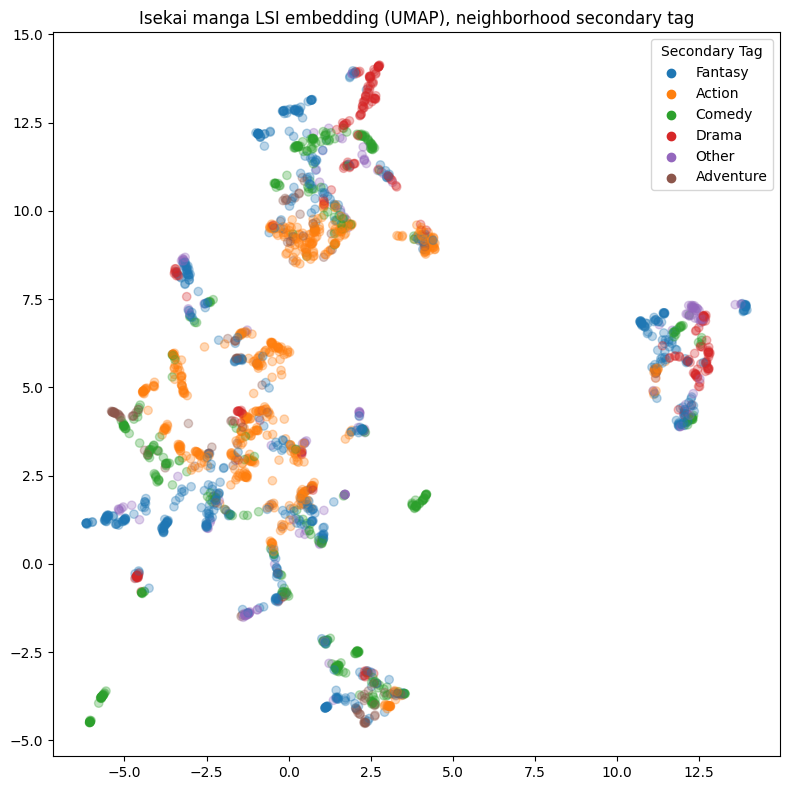

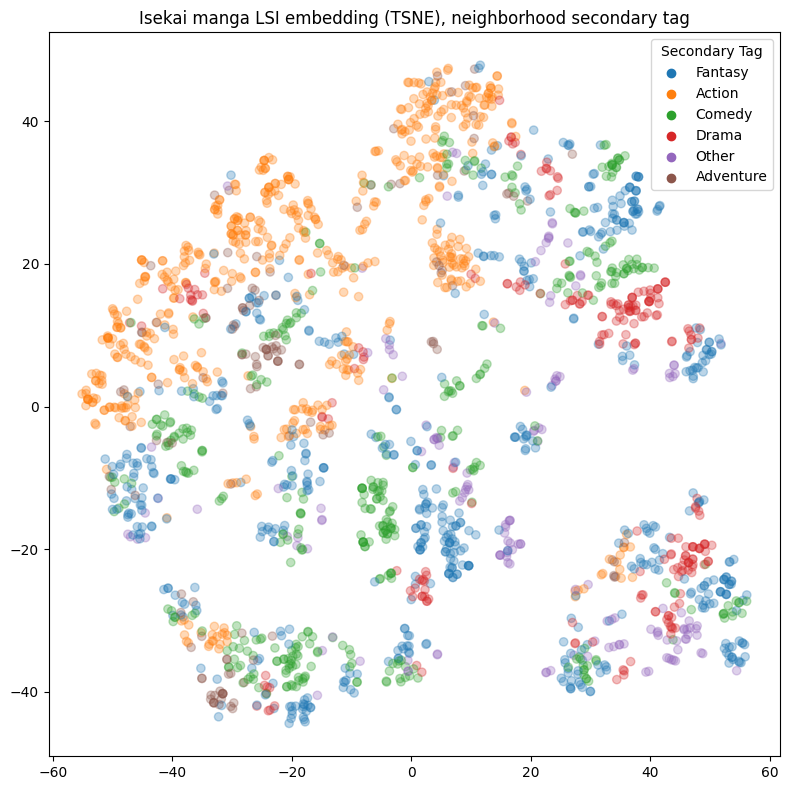

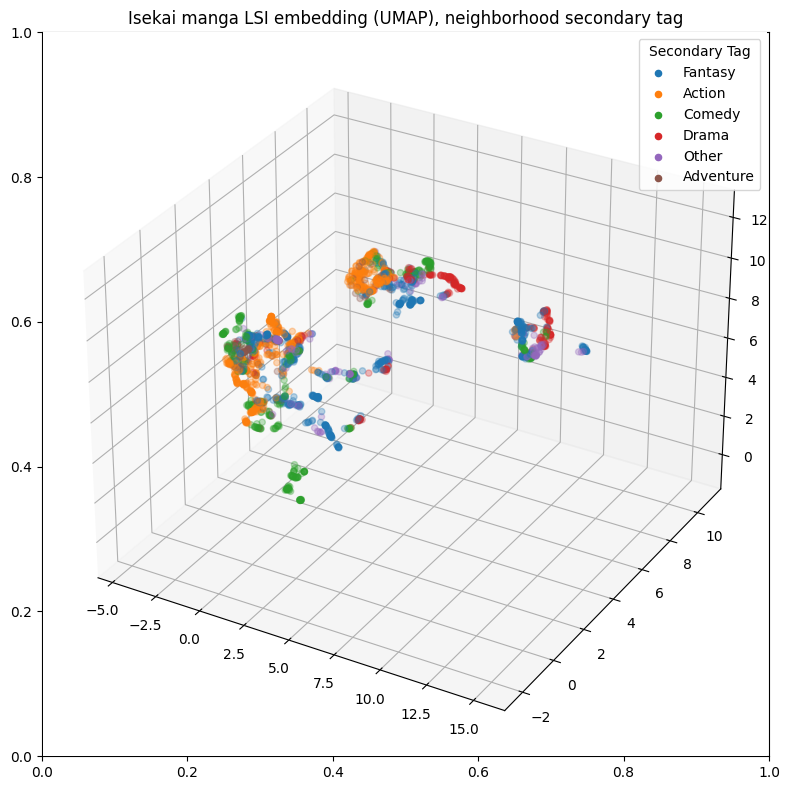

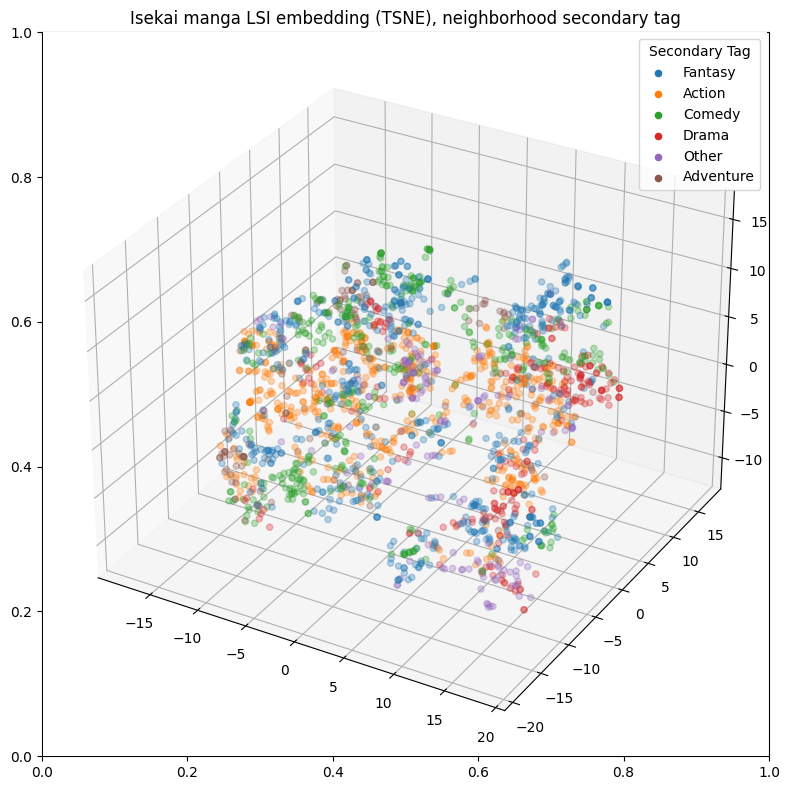

In [26]:
import umap
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from manga_recsys.models.manga import recs_with_secondary_tag, plot_recommendation_dims

primary_tag = "Isekai"
manga_rec_tag = recs_with_secondary_tag(spark, manga_rec, manga_genres, primary_tag)

for n_dims in [2, 3]:
    for reducer in [
        umap.UMAP(n_components=n_dims, metric="cosine"),
        TSNE(n_components=n_dims),
    ]:
        plot_recommendation_dims(
            manga_rec_tag,
            "lsi",
            reducer,
            title=f"{primary_tag} manga LSI embedding ({reducer.__class__.__name__}), neighborhood secondary tag",
            n_dims=n_dims,
        )
        plt.show()

f:\code\mangadex\.venv\lib\site-packages\pyspark\sql\pandas\conversion.py:604: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  [(c, t) for (_, c), t in zip(pdf_slice.iteritems(), arrow_types)]
f:\code\mangadex\.venv\lib\site-packages\pyspark\sql\pandas\conversion.py:604: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  [(c, t) for (_, c), t in zip(pdf_slice.iteritems(), arrow_types)]


+----------+-----+
|       tag|count|
+----------+-----+
|    Comedy| 7647|
|Boys' Love| 4922|
|     Drama| 4519|
|     Other| 2755|
|      null| 2700|
|    Action| 1801|
|   Fantasy| 1483|
+----------+-----+

+--------------------+--------------------+--------------------+--------------------+--------------------+----------+-----+
|                  id|                tags|                 lsi|     recommendations|           distances|       tag|count|
+--------------------+--------------------+--------------------+--------------------+--------------------+----------+-----+
|0003d7e8-31da-463...|[Oneshot, Romance...|[0.56126528978347...|[0003d7e8-31da-46...|[0.0, 0.0, 0.0178...|     Drama|   10|
|000983fe-d3c1-4e6...|[Romance, Video G...|[0.09242275357246...|[86874f6a-974a-48...|[1.19209270899034...|      null| null|
|07c7ac62-c738-480...|[Demons, Romance,...|[0.25048202276229...|[07c7ac62-c738-48...|[0.0, 0.042698726...|   Fantasy|   10|
|07d69599-62a9-446...|[Historical, Long...|[0.

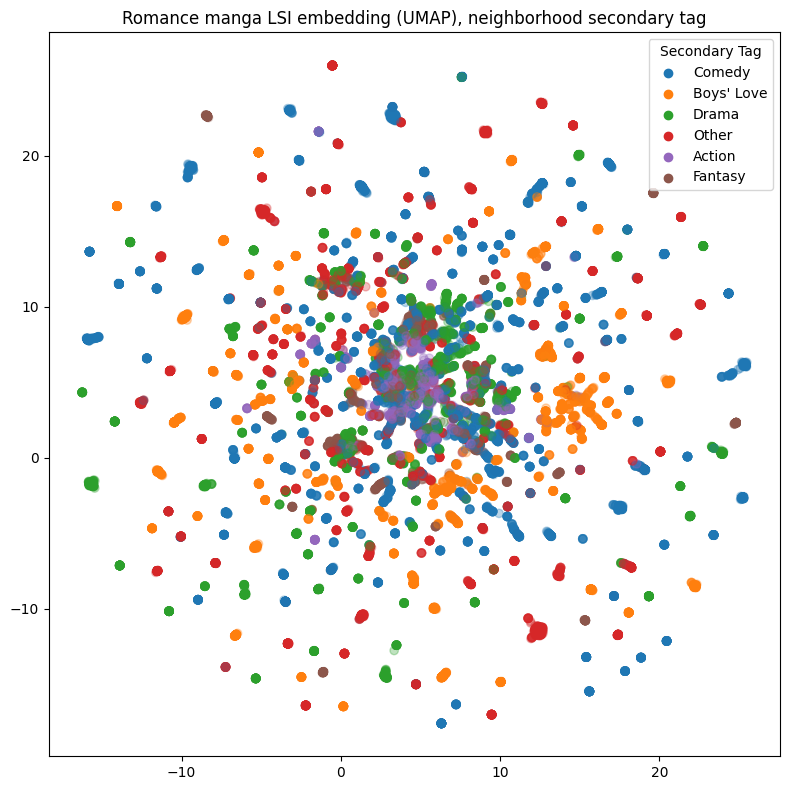

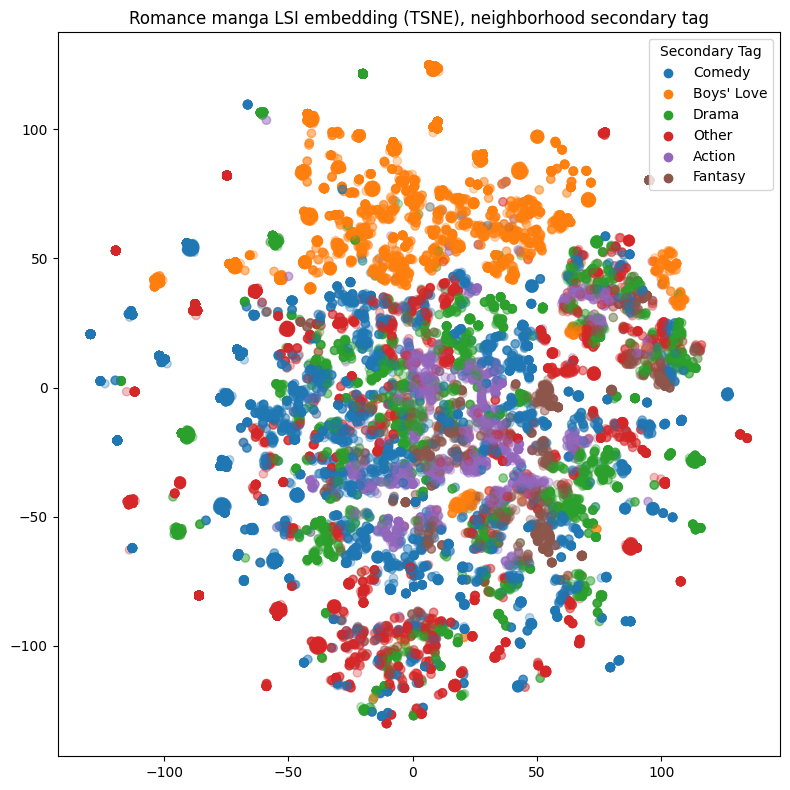

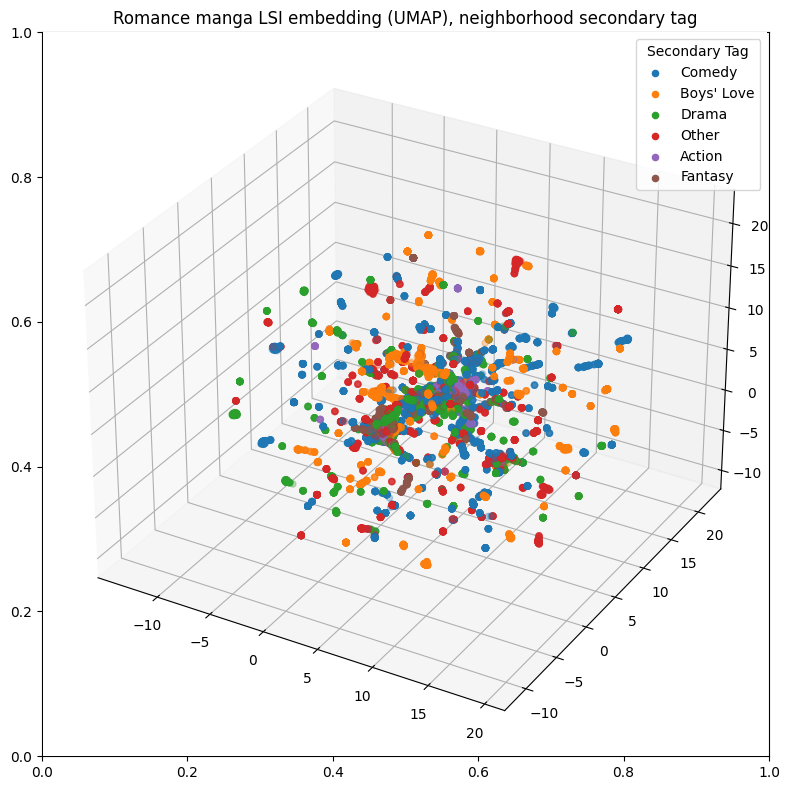

: 

: 

In [27]:
primary_tag = "Romance"
manga_rec_tag = recs_with_secondary_tag(spark, manga_rec, manga_genres, primary_tag)

for n_dims in [2, 3]:
    for reducer in [
        umap.UMAP(n_components=n_dims, metric="cosine"),
        TSNE(n_components=n_dims),
    ]:
        plot_recommendation_dims(
            manga_rec_tag,
            "lsi",
            reducer,
            title=f"{primary_tag} manga LSI embedding ({reducer.__class__.__name__}), neighborhood secondary tag",
            n_dims=n_dims,
            # sample=2500,
        )
        plt.show()